In [1]:
#Import library functions
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn import svm
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
titanic = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')
print(titanic.head(10))

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   
5            6       3                                   Moran, Mr. James   
6            7       1                            McCarthy, Mr. Timothy J   
7            8       3                     Palsson, Master. Gosta Leonard   
8            9       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9           10       2                Nasser, Mrs. Nicholas (Adele Achem)   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1 

In [5]:
#undertanding the data type
varnames = list(titanic.columns)
for name in varnames:
    print(name+": ",type(titanic.loc[1,name]))

PassengerId:  <class 'numpy.int64'>
Pclass:  <class 'numpy.int64'>
Name:  <class 'str'>
Sex:  <class 'str'>
Age:  <class 'numpy.float64'>
SibSp:  <class 'numpy.int64'>
Parch:  <class 'numpy.int64'>
Ticket:  <class 'str'>
Fare:  <class 'numpy.float64'>
Cabin:  <class 'str'>
Embarked:  <class 'str'>
Survived:  <class 'numpy.int64'>


In [6]:
#Findidng Missing Values
titanic.isnull().sum(axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Label Encoder
label_encoder = LabelEncoder()


In [8]:
# Apply label encoding to the 'Sex' column
titanic['Sex_Encoded'] = label_encoder.fit_transform(titanic['Sex'])

In [9]:
# Apply label encoding to the 'Name' column
titanic['Name_Encoded'] = label_encoder.fit_transform(titanic['Name'])

# Apply label encoding to the 'Sex' column
titanic['Embarked_Encoded'] = label_encoder.fit_transform(titanic['Embarked'])


 #Apply label encoding to the 'Sex' column
titanic['Ticket_Encoded'] = label_encoder.fit_transform(titanic['Ticket'])

In [10]:
print(titanic.head(10))

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   
5            6       3                                   Moran, Mr. James   
6            7       1                            McCarthy, Mr. Timothy J   
7            8       3                     Palsson, Master. Gosta Leonard   
8            9       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9           10       2                Nasser, Mrs. Nicholas (Adele Achem)   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1 

In [ ]:
titanic.corr(method='pearson')['Age'].abs()

<ipython-input-82-a6a7d9743d6b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.corr(method='pearson')['Age'].abs()


PassengerId         0.036847
Pclass              0.369226
Age                 1.000000
SibSp               0.308247
Parch               0.189119
Fare                0.096067
Survived            0.077221
Sex_Encoded         0.093254
Name_Encoded        0.062583
Embarked_Encoded    0.025252
Ticket_Encoded      0.075934
Name: Age, dtype: float64

In [ ]:
mean_age_by_Pclass = titanic.groupby('Pclass')['Age'].mean()

# Fill missing 'age' values based on PClass group mean
titanic['Age'] = titanic.apply(lambda row: mean_age_by_Pclass[row['Pclass']] if pd.isna(row['Age']) else row['Age'], axis=1)


In [ ]:
#Findidng Missing Values
titanic.isnull().sum(axis=0)

PassengerId           0
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               687
Embarked              2
Survived              0
Sex_Encoded           0
Name_Encoded          0
Embarked_Encoded      0
Ticket_Encoded        0
dtype: int64

In [ ]:
# Apply label encoding to the 'Cabin' column
titanic['Cabin_Encoded'] = label_encoder.fit_transform(titanic['Cabin'])

In [ ]:
#Findidng Missing Values
titanic.isnull().sum(axis=0)

PassengerId           0
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               687
Embarked              2
Survived              0
Sex_Encoded           0
Name_Encoded          0
Embarked_Encoded      0
Ticket_Encoded        0
Cabin_Encoded         0
dtype: int64

In [ ]:
titanic.corr(method='pearson')['Cabin_Encoded'].abs()

<ipython-input-87-0ecf6b1f1c90>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.corr(method='pearson')['Cabin_Encoded'].abs()


PassengerId         0.035077
Pclass              0.684121
Age                 0.274068
SibSp               0.043593
Parch               0.028324
Fare                0.503355
Survived            0.254888
Sex_Encoded         0.096681
Name_Encoded        0.061959
Embarked_Encoded    0.193205
Ticket_Encoded      0.243696
Cabin_Encoded       1.000000
Name: Cabin_Encoded, dtype: float64

In [ ]:
# Find the most frequent 'Cabin' value for each 'Pclass'
most_frequent_cabin_by_pclass = titanic.groupby('Pclass')['Cabin'].apply(lambda x: x.mode().iloc[0])

# Fill missing 'Cabin' values based on 'Pclass'
titanic['Cabin'] = titanic.apply(lambda row: most_frequent_cabin_by_pclass[row['Pclass']] if pd.isna(row['Cabin']) else row['Cabin'], axis=1)


In [ ]:
#Findidng Missing Values
titanic.isnull().sum(axis=0)

PassengerId         0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin               0
Embarked            2
Survived            0
Sex_Encoded         0
Name_Encoded        0
Embarked_Encoded    0
Ticket_Encoded      0
Cabin_Encoded       0
dtype: int64

In [ ]:
# Find the most frequent 'Cabin' value for each 'Pclass'
most_frequent_Embarked_by_Embarked = titanic.groupby('Pclass')['Embarked'].apply(lambda x: x.mode().iloc[0])

# Fill missing 'Cabin' values based on 'Pclass'
titanic['Embarked'] = titanic.apply(lambda row: most_frequent_Embarked_by_Embarked[row['Pclass']] if pd.isna(row['Embarked']) else row['Embarked'], axis=1)


In [ ]:
#Findidng Missing Values
titanic.isnull().sum(axis=0)

PassengerId         0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin               0
Embarked            0
Survived            0
Sex_Encoded         0
Name_Encoded        0
Embarked_Encoded    0
Ticket_Encoded      0
Cabin_Encoded       0
dtype: int64

In [ ]:
# Drop multiple columns using the drop() method
columns_to_drop = ['Name','Sex','Cabin','Embarked','Ticket']
titanic.drop(columns=columns_to_drop, inplace=True)

In [ ]:
titanic.head(100)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_Encoded,Name_Encoded,Embarked_Encoded,Ticket_Encoded,Cabin_Encoded
0,1,3,22.00000,1,0,7.2500,0,1,108,2,523,147
1,2,1,38.00000,1,0,71.2833,1,0,190,0,596,81
2,3,3,26.00000,0,0,7.9250,1,0,353,2,669,147
3,4,1,35.00000,1,0,53.1000,1,0,272,2,49,55
4,5,3,35.00000,0,0,8.0500,0,1,15,2,472,147
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,3,25.14062,0,0,8.0500,0,1,740,2,475,147
96,97,1,71.00000,0,0,34.6542,0,1,292,0,607,12
97,98,1,23.00000,0,1,63.3583,1,1,308,0,612,91
98,99,2,34.00000,0,1,23.0000,1,0,219,2,117,147


In [ ]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

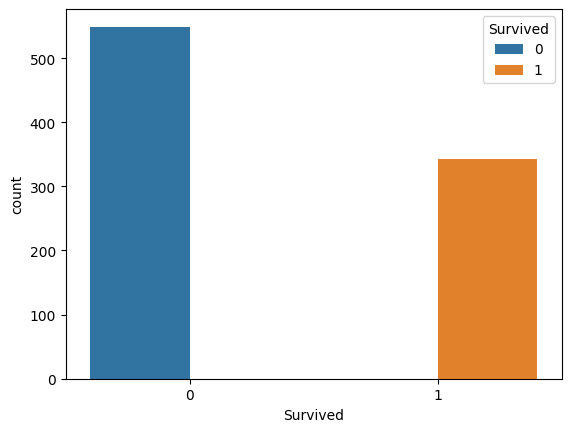

In [ ]:
sns.countplot(x=titanic.Survived, hue=titanic.Survived)

In [ ]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))
scaled_titanic = scaler.fit_transform(titanic)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
# Initialize k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a classifier (Logistic Regression in this example)
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

# Perform k-fold cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)


    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(confusion)

# Print evaluation metrics for each fold
for fold, (accuracy, precision, recall, f1, confusion) in enumerate(zip(accuracy_scores, precision_scores, recall_scores, f1_scores, confusion_matrices), start=1):
    print(f"Fold {fold}:")
    print(f"Accuracy = {accuracy:.4f}")
    print(f"Precision = {precision:.4f}")
    print(f"Recall = {recall:.4f}")
    print(f"F1 Score = {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    print("----------------------")

# Calculate and print average evaluation metrics across folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
average_precision = sum(precision_scores) / len(precision_scores)
average_recall = sum(recall_scores) / len(recall_scores)
average_f1 = sum(f1_scores) / len(f1_scores)
print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1 Score: {average_f1:.4f}")

Fold 1:
Accuracy = 0.7654
Precision = 0.7500
Recall = 0.6486
F1 Score = 0.6957
Confusion Matrix:
[[89 16]
 [26 48]]
----------------------
Fold 2:
Accuracy = 0.7753
Precision = 0.7547
Recall = 0.5970
F1 Score = 0.6667
Confusion Matrix:
[[98 13]
 [27 40]]
----------------------
Fold 3:
Accuracy = 0.8427
Precision = 0.8281
Recall = 0.7571
F1 Score = 0.7910
Confusion Matrix:
[[97 11]
 [17 53]]
----------------------
Fold 4:
Accuracy = 0.7528
Precision = 0.6897
Recall = 0.6061
F1 Score = 0.6452
Confusion Matrix:
[[94 18]
 [26 40]]
----------------------
Fold 5:
Accuracy = 0.7978
Precision = 0.7636
Recall = 0.6462
F1 Score = 0.7000
Confusion Matrix:
[[100  13]
 [ 23  42]]
----------------------
Average Accuracy: 0.7868
Average Precision: 0.7572
Average Recall: 0.6510
Average F1 Score: 0.6997


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
# Initialize k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a classifier (Naive Bayes in this example)
from sklearn.naive_bayes import GaussianNB
nav_model= GaussianNB()

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

# Perform k-fold cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    nav_model.fit(X_train, y_train)
    y_pred = nav_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)


    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(confusion)

# Print evaluation metrics for each fold
for fold, (accuracy, precision, recall, f1, confusion) in enumerate(zip(accuracy_scores, precision_scores, recall_scores, f1_scores, confusion_matrices), start=1):
    print(f"Fold {fold}:")
    print(f"Accuracy = {accuracy:.4f}")
    print(f"Precision = {precision:.4f}")
    print(f"Recall = {recall:.4f}")
    print(f"F1 Score = {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    print("----------------------")

# Calculate and print average evaluation metrics across folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
average_precision = sum(precision_scores) / len(precision_scores)
average_recall = sum(recall_scores) / len(recall_scores)
average_f1 = sum(f1_scores) / len(f1_scores)
print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1 Score: {average_f1:.4f}")

Fold 1:
Accuracy = 0.8045
Precision = 0.7600
Recall = 0.7703
F1 Score = 0.7651
Confusion Matrix:
[[87 18]
 [17 57]]
----------------------
Fold 2:
Accuracy = 0.8090
Precision = 0.7797
Recall = 0.6866
F1 Score = 0.7302
Confusion Matrix:
[[98 13]
 [21 46]]
----------------------
Fold 3:
Accuracy = 0.7978
Precision = 0.7742
Recall = 0.6857
F1 Score = 0.7273
Confusion Matrix:
[[94 14]
 [22 48]]
----------------------
Fold 4:
Accuracy = 0.7528
Precision = 0.6897
Recall = 0.6061
F1 Score = 0.6452
Confusion Matrix:
[[94 18]
 [26 40]]
----------------------
Fold 5:
Accuracy = 0.7584
Precision = 0.7037
Recall = 0.5846
F1 Score = 0.6387
Confusion Matrix:
[[97 16]
 [27 38]]
----------------------
Average Accuracy: 0.7845
Average Precision: 0.7414
Average Recall: 0.6666
Average F1 Score: 0.7013


In [ ]:
# Initialize k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Build a KNN using 5 neighbor nodes
knn_model = KNeighborsClassifier(n_neighbors=5)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

# Perform k-fold cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)


    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(confusion)

# Print evaluation metrics for each fold
for fold, (accuracy, precision, recall, f1, confusion) in enumerate(zip(accuracy_scores, precision_scores, recall_scores, f1_scores, confusion_matrices), start=1):
    print(f"Fold {fold}:")
    print(f"Accuracy = {accuracy:.4f}")
    print(f"Precision = {precision:.4f}")
    print(f"Recall = {recall:.4f}")
    print(f"F1 Score = {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    print("----------------------")

# Calculate and print average evaluation metrics across folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
average_precision = sum(precision_scores) / len(precision_scores)
average_recall = sum(recall_scores) / len(recall_scores)
average_f1 = sum(f1_scores) / len(f1_scores)
print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1 Score: {average_f1:.4f}")

Fold 1:
Accuracy = 0.6704
Precision = 0.6531
Recall = 0.4324
F1 Score = 0.5203
Confusion Matrix:
[[88 17]
 [42 32]]
----------------------
Fold 2:
Accuracy = 0.6124
Precision = 0.4828
Recall = 0.4179
F1 Score = 0.4480
Confusion Matrix:
[[81 30]
 [39 28]]
----------------------
Fold 3:
Accuracy = 0.6404
Precision = 0.5484
Recall = 0.4857
F1 Score = 0.5152
Confusion Matrix:
[[80 28]
 [36 34]]
----------------------
Fold 4:
Accuracy = 0.6910
Precision = 0.6038
Recall = 0.4848
F1 Score = 0.5378
Confusion Matrix:
[[91 21]
 [34 32]]
----------------------
Fold 5:
Accuracy = 0.6404
Precision = 0.5098
Recall = 0.4000
F1 Score = 0.4483
Confusion Matrix:
[[88 25]
 [39 26]]
----------------------
Average Accuracy: 0.6509
Average Precision: 0.5596
Average Recall: 0.4442
Average F1 Score: 0.4939


In [ ]:
# Initialize k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

from sklearn.svm import SVC
svl_model = SVC(kernel='linear')

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

# Perform k-fold cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    svl_model.fit(X_train, y_train)
    y_pred = svl_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)


    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(confusion)

# Print evaluation metrics for each fold
for fold, (accuracy, precision, recall, f1, confusion) in enumerate(zip(accuracy_scores, precision_scores, recall_scores, f1_scores, confusion_matrices), start=1):
    print(f"Fold {fold}:")
    print(f"Accuracy = {accuracy:.4f}")
    print(f"Precision = {precision:.4f}")
    print(f"Recall = {recall:.4f}")
    print(f"F1 Score = {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    print("----------------------")

# Calculate and print average evaluation metrics across folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
average_precision = sum(precision_scores) / len(precision_scores)
average_recall = sum(recall_scores) / len(recall_scores)
average_f1 = sum(f1_scores) / len(f1_scores)
print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1 Score: {average_f1:.4f}")

Fold 1:
Accuracy = 0.7877
Precision = 0.7647
Recall = 0.7027
F1 Score = 0.7324
Confusion Matrix:
[[89 16]
 [22 52]]
----------------------
Fold 2:
Accuracy = 0.7584
Precision = 0.7069
Recall = 0.6119
F1 Score = 0.6560
Confusion Matrix:
[[94 17]
 [26 41]]
----------------------
Fold 3:
Accuracy = 0.8427
Precision = 0.8182
Recall = 0.7714
F1 Score = 0.7941
Confusion Matrix:
[[96 12]
 [16 54]]
----------------------
Fold 4:
Accuracy = 0.7584
Precision = 0.7091
Recall = 0.5909
F1 Score = 0.6446
Confusion Matrix:
[[96 16]
 [27 39]]
----------------------
Fold 5:
Accuracy = 0.8090
Precision = 0.7627
Recall = 0.6923
F1 Score = 0.7258
Confusion Matrix:
[[99 14]
 [20 45]]
----------------------
Average Accuracy: 0.7912
Average Precision: 0.7523
Average Recall: 0.6739
Average F1 Score: 0.7106


In [ ]:
# Initialize k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

from sklearn.tree import DecisionTreeClassifier
# Create the Decision Tree classifier
DT_model = DecisionTreeClassifier()

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

# Perform k-fold cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    DT_model.fit(X_train, y_train)
    y_pred = DT_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)


    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(confusion)

# Print evaluation metrics for each fold
for fold, (accuracy, precision, recall, f1, confusion) in enumerate(zip(accuracy_scores, precision_scores, recall_scores, f1_scores, confusion_matrices), start=1):
    print(f"Fold {fold}:")
    print(f"Accuracy = {accuracy:.4f}")
    print(f"Precision = {precision:.4f}")
    print(f"Recall = {recall:.4f}")
    print(f"F1 Score = {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    print("----------------------")

# Calculate and print average evaluation metrics across folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
average_precision = sum(precision_scores) / len(precision_scores)
average_recall = sum(recall_scores) / len(recall_scores)
average_f1 = sum(f1_scores) / len(f1_scores)
print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1 Score: {average_f1:.4f}")

Fold 1:
Accuracy = 0.7765
Precision = 0.7429
Recall = 0.7027
F1 Score = 0.7222
Confusion Matrix:
[[87 18]
 [22 52]]
----------------------
Fold 2:
Accuracy = 0.7360
Precision = 0.6562
Recall = 0.6269
F1 Score = 0.6412
Confusion Matrix:
[[89 22]
 [25 42]]
----------------------
Fold 3:
Accuracy = 0.8202
Precision = 0.7714
Recall = 0.7714
F1 Score = 0.7714
Confusion Matrix:
[[92 16]
 [16 54]]
----------------------
Fold 4:
Accuracy = 0.7416
Precision = 0.6471
Recall = 0.6667
F1 Score = 0.6567
Confusion Matrix:
[[88 24]
 [22 44]]
----------------------
Fold 5:
Accuracy = 0.7809
Precision = 0.6711
Recall = 0.7846
F1 Score = 0.7234
Confusion Matrix:
[[88 25]
 [14 51]]
----------------------
Average Accuracy: 0.7710
Average Precision: 0.6977
Average Recall: 0.7105
Average F1 Score: 0.7030


In [ ]:
# Initialize k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

from sklearn.ensemble import AdaBoostClassifier

from sklearn.naive_bayes import GaussianNB
nav= GaussianNB()

# Create adaboost classifer object
Ada_model =AdaBoostClassifier(n_estimators=200, base_estimator=nav,learning_rate=.1)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

# Perform k-fold cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    Ada_model.fit(X_train, y_train)
    y_pred = Ada_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)


    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(confusion)

# Print evaluation metrics for each fold
for fold, (accuracy, precision, recall, f1, confusion) in enumerate(zip(accuracy_scores, precision_scores, recall_scores, f1_scores, confusion_matrices), start=1):
    print(f"Fold {fold}:")
    print(f"Accuracy = {accuracy:.4f}")
    print(f"Precision = {precision:.4f}")
    print(f"Recall = {recall:.4f}")
    print(f"F1 Score = {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    print("----------------------")

# Calculate and print average evaluation metrics across folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
average_precision = sum(precision_scores) / len(precision_scores)
average_recall = sum(recall_scores) / len(recall_scores)
average_f1 = sum(f1_scores) / len(f1_scores)
print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1 Score: {average_f1:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fold 1:
Accuracy = 0.8101
Precision = 0.7857
Recall = 0.7432
F1 Score = 0.7639
Confusion Matrix:
[[90 15]
 [19 55]]
----------------------
Fold 2:
Accuracy = 0.7978
Precision = 0.7719
Recall = 0.6567
F1 Score = 0.7097
Confusion Matrix:
[[98 13]
 [23 44]]
----------------------
Fold 3:
Accuracy = 0.8427
Precision = 0.8182
Recall = 0.7714
F1 Score = 0.7941
Confusion Matrix:
[[96 12]
 [16 54]]
----------------------
Fold 4:
Accuracy = 0.7640
Precision = 0.7000
Recall = 0.6364
F1 Score = 0.6667
Confusion Matrix:
[[94 18]
 [24 42]]
----------------------
Fold 5:
Accuracy = 0.8034
Precision = 0.7419
Recall = 0.7077
F1 Score = 0.7244
Confusion Matrix:
[[97 16]
 [19 46]]
----------------------
Average Accuracy: 0.8036
Average Precision: 0.7636
Average Recall: 0.7031
Average F1 Score: 0.7318


In [ ]:
#Applying Feature Selection Techniques

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Initialize a Random Forest classifier
clf = RandomForestClassifier()

# Use SelectFromModel to select important features
sfm = SelectFromModel(clf, threshold='median')  # You can adjust the threshold as needed
sfm.fit(X, y)

# Transform the feature matrix
X_selected = sfm.transform(X)

# Get the selected feature names
selected_feature_names = X.columns[sfm.get_support()]

# Print the selected feature names
print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['PassengerId', 'Age', 'Fare', 'Sex_Encoded', 'Name_Encoded',
       'Ticket_Encoded'],
      dtype='object')


In [ ]:
titanic_FS_RF= titanic

In [ ]:
titanic_FS_RF.head(100)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_Encoded,Name_Encoded,Embarked_Encoded,Ticket_Encoded,Cabin_Encoded
0,1,3,22.00000,1,0,7.2500,0,1,108,2,523,147
1,2,1,38.00000,1,0,71.2833,1,0,190,0,596,81
2,3,3,26.00000,0,0,7.9250,1,0,353,2,669,147
3,4,1,35.00000,1,0,53.1000,1,0,272,2,49,55
4,5,3,35.00000,0,0,8.0500,0,1,15,2,472,147
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,3,25.14062,0,0,8.0500,0,1,740,2,475,147
96,97,1,71.00000,0,0,34.6542,0,1,292,0,607,12
97,98,1,23.00000,0,1,63.3583,1,1,308,0,612,91
98,99,2,34.00000,0,1,23.0000,1,0,219,2,117,147


In [ ]:
# Drop multiple columns using the drop() method
columns_to_drop = ['Pclass','SibSp','Parch','Embarked_Encoded','Cabin_Encoded']
titanic_FS_RF.drop(columns=columns_to_drop, inplace=True)

In [ ]:
X = titanic_FS_RF.drop('Survived', axis=1)
y = titanic_FS_RF['Survived']

In [ ]:
# Initialize k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

from sklearn.ensemble import AdaBoostClassifier

from sklearn.naive_bayes import GaussianNB
nav= GaussianNB()

# Create adaboost classifer object
Ada_model =AdaBoostClassifier(n_estimators=200, base_estimator=nav,learning_rate=.1)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

# Perform k-fold cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    Ada_model.fit(X_train, y_train)
    y_pred = Ada_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)


    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(confusion)

# Print evaluation metrics for each fold
for fold, (accuracy, precision, recall, f1, confusion) in enumerate(zip(accuracy_scores, precision_scores, recall_scores, f1_scores, confusion_matrices), start=1):
    print(f"Fold {fold}:")
    print(f"Accuracy = {accuracy:.4f}")
    print(f"Precision = {precision:.4f}")
    print(f"Recall = {recall:.4f}")
    print(f"F1 Score = {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    print("----------------------")

# Calculate and print average evaluation metrics across folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
average_precision = sum(precision_scores) / len(precision_scores)
average_recall = sum(recall_scores) / len(recall_scores)
average_f1 = sum(f1_scores) / len(f1_scores)
print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1 Score: {average_f1:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fold 1:
Accuracy = 0.7877
Precision = 0.7571
Recall = 0.7162
F1 Score = 0.7361
Confusion Matrix:
[[88 17]
 [21 53]]
----------------------
Fold 2:
Accuracy = 0.7697
Precision = 0.7097
Recall = 0.6567
F1 Score = 0.6822
Confusion Matrix:
[[93 18]
 [23 44]]
----------------------
Fold 3:
Accuracy = 0.8202
Precision = 0.7794
Recall = 0.7571
F1 Score = 0.7681
Confusion Matrix:
[[93 15]
 [17 53]]
----------------------
Fold 4:
Accuracy = 0.7191
Precision = 0.6250
Recall = 0.6061
F1 Score = 0.6154
Confusion Matrix:
[[88 24]
 [26 40]]
----------------------
Fold 5:
Accuracy = 0.7978
Precision = 0.7302
Recall = 0.7077
F1 Score = 0.7188
Confusion Matrix:
[[96 17]
 [19 46]]
----------------------
Average Accuracy: 0.7789
Average Precision: 0.7203
Average Recall: 0.6888
Average F1 Score: 0.7041


In [ ]:
# Initialize k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

from sklearn.tree import DecisionTreeClassifier
# Create the Decision Tree classifier
DT_model = DecisionTreeClassifier()

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

# Perform k-fold cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    DT_model.fit(X_train, y_train)
    y_pred = DT_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)


    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(confusion)

# Print evaluation metrics for each fold
for fold, (accuracy, precision, recall, f1, confusion) in enumerate(zip(accuracy_scores, precision_scores, recall_scores, f1_scores, confusion_matrices), start=1):
    print(f"Fold {fold}:")
    print(f"Accuracy = {accuracy:.4f}")
    print(f"Precision = {precision:.4f}")
    print(f"Recall = {recall:.4f}")
    print(f"F1 Score = {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    print("----------------------")

# Calculate and print average evaluation metrics across folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
average_precision = sum(precision_scores) / len(precision_scores)
average_recall = sum(recall_scores) / len(recall_scores)
average_f1 = sum(f1_scores) / len(f1_scores)
print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1 Score: {average_f1:.4f}")

Fold 1:
Accuracy = 0.7821
Precision = 0.7333
Recall = 0.7432
F1 Score = 0.7383
Confusion Matrix:
[[85 20]
 [19 55]]
----------------------
Fold 2:
Accuracy = 0.7191
Precision = 0.6349
Recall = 0.5970
F1 Score = 0.6154
Confusion Matrix:
[[88 23]
 [27 40]]
----------------------
Fold 3:
Accuracy = 0.7135
Precision = 0.6338
Recall = 0.6429
F1 Score = 0.6383
Confusion Matrix:
[[82 26]
 [25 45]]
----------------------
Fold 4:
Accuracy = 0.7303
Precision = 0.6286
Recall = 0.6667
F1 Score = 0.6471
Confusion Matrix:
[[86 26]
 [22 44]]
----------------------
Fold 5:
Accuracy = 0.8034
Precision = 0.7344
Recall = 0.7231
F1 Score = 0.7287
Confusion Matrix:
[[96 17]
 [18 47]]
----------------------
Average Accuracy: 0.7497
Average Precision: 0.6730
Average Recall: 0.6746
Average F1 Score: 0.6735


In [ ]:
# Initialize k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a classifier (Logistic Regression in this example)
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

# Perform k-fold cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)


    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(confusion)

# Print evaluation metrics for each fold
for fold, (accuracy, precision, recall, f1, confusion) in enumerate(zip(accuracy_scores, precision_scores, recall_scores, f1_scores, confusion_matrices), start=1):
    print(f"Fold {fold}:")
    print(f"Accuracy = {accuracy:.4f}")
    print(f"Precision = {precision:.4f}")
    print(f"Recall = {recall:.4f}")
    print(f"F1 Score = {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    print("----------------------")

# Calculate and print average evaluation metrics across folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
average_precision = sum(precision_scores) / len(precision_scores)
average_recall = sum(recall_scores) / len(recall_scores)
average_f1 = sum(f1_scores) / len(f1_scores)
print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1 Score: {average_f1:.4f}")

Fold 1:
Accuracy = 0.7821
Precision = 0.7465
Recall = 0.7162
F1 Score = 0.7310
Confusion Matrix:
[[87 18]
 [21 53]]
----------------------
Fold 2:
Accuracy = 0.7528
Precision = 0.6949
Recall = 0.6119
F1 Score = 0.6508
Confusion Matrix:
[[93 18]
 [26 41]]
----------------------
Fold 3:
Accuracy = 0.8371
Precision = 0.7971
Recall = 0.7857
F1 Score = 0.7914
Confusion Matrix:
[[94 14]
 [15 55]]
----------------------
Fold 4:
Accuracy = 0.7472
Precision = 0.6667
Recall = 0.6364
F1 Score = 0.6512
Confusion Matrix:
[[91 21]
 [24 42]]
----------------------
Fold 5:
Accuracy = 0.8034
Precision = 0.7419
Recall = 0.7077
F1 Score = 0.7244
Confusion Matrix:
[[97 16]
 [19 46]]
----------------------
Average Accuracy: 0.7845
Average Precision: 0.7294
Average Recall: 0.6916
Average F1 Score: 0.7098


In [ ]:
# Initialize k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a classifier (Naive Bayes in this example)
from sklearn.naive_bayes import GaussianNB
nav_model= GaussianNB()

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

# Perform k-fold cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    nav_model.fit(X_train, y_train)
    y_pred = nav_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)


    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(confusion)

# Print evaluation metrics for each fold
for fold, (accuracy, precision, recall, f1, confusion) in enumerate(zip(accuracy_scores, precision_scores, recall_scores, f1_scores, confusion_matrices), start=1):
    print(f"Fold {fold}:")
    print(f"Accuracy = {accuracy:.4f}")
    print(f"Precision = {precision:.4f}")
    print(f"Recall = {recall:.4f}")
    print(f"F1 Score = {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    print("----------------------")

# Calculate and print average evaluation metrics across folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
average_precision = sum(precision_scores) / len(precision_scores)
average_recall = sum(recall_scores) / len(recall_scores)
average_f1 = sum(f1_scores) / len(f1_scores)
print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1 Score: {average_f1:.4f}")

Fold 1:
Accuracy = 0.7765
Precision = 0.7361
Recall = 0.7162
F1 Score = 0.7260
Confusion Matrix:
[[86 19]
 [21 53]]
----------------------
Fold 2:
Accuracy = 0.7640
Precision = 0.6923
Recall = 0.6716
F1 Score = 0.6818
Confusion Matrix:
[[91 20]
 [22 45]]
----------------------
Fold 3:
Accuracy = 0.8315
Precision = 0.7857
Recall = 0.7857
F1 Score = 0.7857
Confusion Matrix:
[[93 15]
 [15 55]]
----------------------
Fold 4:
Accuracy = 0.7416
Precision = 0.6515
Recall = 0.6515
F1 Score = 0.6515
Confusion Matrix:
[[89 23]
 [23 43]]
----------------------
Fold 5:
Accuracy = 0.8034
Precision = 0.7344
Recall = 0.7231
F1 Score = 0.7287
Confusion Matrix:
[[96 17]
 [18 47]]
----------------------
Average Accuracy: 0.7834
Average Precision: 0.7200
Average Recall: 0.7096
Average F1 Score: 0.7148


In [ ]:
# Initialize k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Build a KNN using 5 neighbor nodes
knn_model = KNeighborsClassifier(n_neighbors=5)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

# Perform k-fold cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)


    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(confusion)

# Print evaluation metrics for each fold
for fold, (accuracy, precision, recall, f1, confusion) in enumerate(zip(accuracy_scores, precision_scores, recall_scores, f1_scores, confusion_matrices), start=1):
    print(f"Fold {fold}:")
    print(f"Accuracy = {accuracy:.4f}")
    print(f"Precision = {precision:.4f}")
    print(f"Recall = {recall:.4f}")
    print(f"F1 Score = {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    print("----------------------")

# Calculate and print average evaluation metrics across folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
average_precision = sum(precision_scores) / len(precision_scores)
average_recall = sum(recall_scores) / len(recall_scores)
average_f1 = sum(f1_scores) / len(f1_scores)
print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1 Score: {average_f1:.4f}")

Fold 1:
Accuracy = 0.6648
Precision = 0.6400
Recall = 0.4324
F1 Score = 0.5161
Confusion Matrix:
[[87 18]
 [42 32]]
----------------------
Fold 2:
Accuracy = 0.5955
Precision = 0.4603
Recall = 0.4328
F1 Score = 0.4462
Confusion Matrix:
[[77 34]
 [38 29]]
----------------------
Fold 3:
Accuracy = 0.6461
Precision = 0.5556
Recall = 0.5000
F1 Score = 0.5263
Confusion Matrix:
[[80 28]
 [35 35]]
----------------------
Fold 4:
Accuracy = 0.6966
Precision = 0.6200
Recall = 0.4697
F1 Score = 0.5345
Confusion Matrix:
[[93 19]
 [35 31]]
----------------------
Fold 5:
Accuracy = 0.6180
Precision = 0.4717
Recall = 0.3846
F1 Score = 0.4237
Confusion Matrix:
[[85 28]
 [40 25]]
----------------------
Average Accuracy: 0.6442
Average Precision: 0.5495
Average Recall: 0.4439
Average F1 Score: 0.4894


In [ ]:
# Initialize k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

from sklearn.svm import SVC
svl_model = SVC(kernel='linear')

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

# Perform k-fold cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    svl_model.fit(X_train, y_train)
    y_pred = svl_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)


    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(confusion)

# Print evaluation metrics for each fold
for fold, (accuracy, precision, recall, f1, confusion) in enumerate(zip(accuracy_scores, precision_scores, recall_scores, f1_scores, confusion_matrices), start=1):
    print(f"Fold {fold}:")
    print(f"Accuracy = {accuracy:.4f}")
    print(f"Precision = {precision:.4f}")
    print(f"Recall = {recall:.4f}")
    print(f"F1 Score = {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    print("----------------------")

# Calculate and print average evaluation metrics across folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
average_precision = sum(precision_scores) / len(precision_scores)
average_recall = sum(recall_scores) / len(recall_scores)
average_f1 = sum(f1_scores) / len(f1_scores)
print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1 Score: {average_f1:.4f}")

Fold 1:
Accuracy = 0.7821
Precision = 0.7536
Recall = 0.7027
F1 Score = 0.7273
Confusion Matrix:
[[88 17]
 [22 52]]
----------------------
Fold 2:
Accuracy = 0.7640
Precision = 0.7193
Recall = 0.6119
F1 Score = 0.6613
Confusion Matrix:
[[95 16]
 [26 41]]
----------------------
Fold 3:
Accuracy = 0.8427
Precision = 0.8088
Recall = 0.7857
F1 Score = 0.7971
Confusion Matrix:
[[95 13]
 [15 55]]
----------------------
Fold 4:
Accuracy = 0.7416
Precision = 0.6613
Recall = 0.6212
F1 Score = 0.6406
Confusion Matrix:
[[91 21]
 [25 41]]
----------------------
Fold 5:
Accuracy = 0.8034
Precision = 0.7419
Recall = 0.7077
F1 Score = 0.7244
Confusion Matrix:
[[97 16]
 [19 46]]
----------------------
Average Accuracy: 0.7868
Average Precision: 0.7370
Average Recall: 0.6859
Average F1 Score: 0.7101


In [ ]:
# Initialize k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

import xgboost as xgb
# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier()


accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

# Perform k-fold cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)


    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(confusion)

# Print evaluation metrics for each fold
for fold, (accuracy, precision, recall, f1, confusion) in enumerate(zip(accuracy_scores, precision_scores, recall_scores, f1_scores, confusion_matrices), start=1):
    print(f"Fold {fold}:")
    print(f"Accuracy = {accuracy:.4f}")
    print(f"Precision = {precision:.4f}")
    print(f"Recall = {recall:.4f}")
    print(f"F1 Score = {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    print("----------------------")

# Calculate and print average evaluation metrics across folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
average_precision = sum(precision_scores) / len(precision_scores)
average_recall = sum(recall_scores) / len(recall_scores)
average_f1 = sum(f1_scores) / len(f1_scores)
print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1 Score: {average_f1:.4f}")

Fold 1:
Accuracy = 0.8212
Precision = 0.8088
Recall = 0.7432
F1 Score = 0.7746
Confusion Matrix:
[[92 13]
 [19 55]]
----------------------
Fold 2:
Accuracy = 0.7921
Precision = 0.7885
Recall = 0.6119
F1 Score = 0.6891
Confusion Matrix:
[[100  11]
 [ 26  41]]
----------------------
Fold 3:
Accuracy = 0.8371
Precision = 0.8060
Recall = 0.7714
F1 Score = 0.7883
Confusion Matrix:
[[95 13]
 [16 54]]
----------------------
Fold 4:
Accuracy = 0.7753
Precision = 0.7097
Recall = 0.6667
F1 Score = 0.6875
Confusion Matrix:
[[94 18]
 [22 44]]
----------------------
Fold 5:
Accuracy = 0.8146
Precision = 0.7667
Recall = 0.7077
F1 Score = 0.7360
Confusion Matrix:
[[99 14]
 [19 46]]
----------------------
Average Accuracy: 0.8081
Average Precision: 0.7759
Average Recall: 0.7002
Average F1 Score: 0.7351


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE


# Initialize a Random Forest classifier
clf = RandomForestClassifier()

# Initialize RFE for feature selection
num_features_to_select = 5  # Choose the number of features you want to select
rfe = RFE(estimator=clf, n_features_to_select=num_features_to_select)

# Fit RFE and transform the feature matrix
X_selected = rfe.fit_transform(X, y)

# Get the selected feature names
selected_feature_names = X.columns[rfe.support_]

# Print the selected feature names
print("Selected Features:")
print(selected_feature_names)


Selected Features:
Index(['Age', 'Fare', 'Sex_Encoded', 'Name_Encoded', 'Ticket_Encoded'], dtype='object')


In [ ]:
titanic_FS_RFE=titanic

In [ ]:
titanic.head(100)

,PassengerId,Age,Fare,Survived,Sex_Encoded,Name_Encoded,Ticket_Encoded
0,1,22.00000,7.2500,0,1,108,523
1,2,38.00000,71.2833,1,0,190,596
2,3,26.00000,7.9250,1,0,353,669
3,4,35.00000,53.1000,1,0,272,49
4,5,35.00000,8.0500,0,1,15,472
...,...,...,...,...,...,...,...
95,96,25.14062,8.0500,0,1,740,475
96,97,71.00000,34.6542,0,1,292,607
97,98,23.00000,63.3583,1,1,308,612
98,99,34.00000,23.0000,1,0,219,117


In [ ]:
# Drop multiple columns using the drop() method
columns_to_drop = ['Pclass','SibSp','Parch','Embarked_Encoded','Cabin_Encoded', 'PassengerId']
titanic_FS_RFE.drop(columns=columns_to_drop, inplace=True)

KeyError: ignored

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Initialize SelectKBest with chi-squared score
num_features_to_select = 5  # Choose the number of features you want to select
selector = SelectKBest(score_func=chi2, k=num_features_to_select)

# Fit and transform the feature matrix using SelectKBest
X_selected = selector.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_feature_names = X.columns[selected_feature_indices]

# Print the selected feature names
print("Selected Features:")
print(selected_feature_names)


Selected Features:
Index(['Fare', 'Sex_Encoded', 'Name_Encoded', 'Ticket_Encoded',
       'Cabin_Encoded'],
      dtype='object')


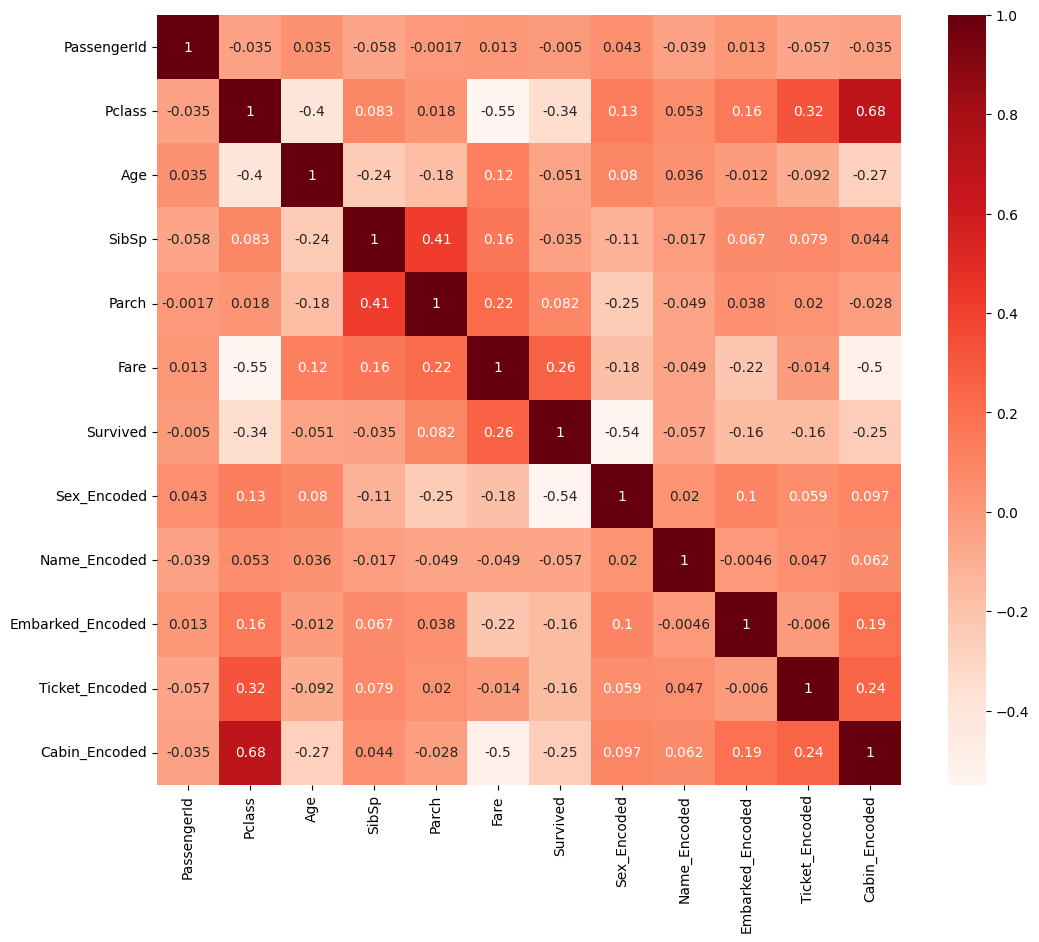

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = titanic.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["Survived"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

Pclass           0.338481
Fare             0.257307
Survived         1.000000
Sex_Encoded      0.543351
Cabin_Encoded    0.254888
Name: Survived, dtype: float64

In [ ]:
titanic.head(100)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_Encoded,Name_Encoded,Embarked_Encoded,Ticket_Encoded,Cabin_Encoded
0,1,3,22.00000,1,0,7.2500,0,1,108,2,523,147
1,2,1,38.00000,1,0,71.2833,1,0,190,0,596,81
2,3,3,26.00000,0,0,7.9250,1,0,353,2,669,147
3,4,1,35.00000,1,0,53.1000,1,0,272,2,49,55
4,5,3,35.00000,0,0,8.0500,0,1,15,2,472,147
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,3,25.14062,0,0,8.0500,0,1,740,2,475,147
96,97,1,71.00000,0,0,34.6542,0,1,292,0,607,12
97,98,1,23.00000,0,1,63.3583,1,1,308,0,612,91
98,99,2,34.00000,0,1,23.0000,1,0,219,2,117,147


In [ ]:
# Drop multiple columns using the drop() method
columns_to_drop = ['PassengerId','Age','SibSp','Parch','Name_Encoded', 'Embarked_Encoded']
titanic.drop(columns=columns_to_drop, inplace=True)

In [ ]:
titanic.head(100)

,Pclass,Fare,Survived,Sex_Encoded,Ticket_Encoded,Cabin_Encoded
0,3,7.2500,0,1,523,147
1,1,71.2833,1,0,596,81
2,3,7.9250,1,0,669,147
3,1,53.1000,1,0,49,55
4,3,8.0500,0,1,472,147
...,...,...,...,...,...,...
95,3,8.0500,0,1,475,147
96,1,34.6542,0,1,607,12
97,1,63.3583,1,1,612,91
98,2,23.0000,1,0,117,147


In [ ]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))
scaled_titanic = scaler.fit_transform(titanic)

In [ ]:
from sklearn.model_selection import KFold
# Initialize k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a classifier (Logistic Regression in this example)
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

# Perform k-fold cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)


    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(confusion)

# Print evaluation metrics for each fold
for fold, (accuracy, precision, recall, f1, confusion) in enumerate(zip(accuracy_scores, precision_scores, recall_scores, f1_scores, confusion_matrices), start=1):
    print(f"Fold {fold}:")
    print(f"Accuracy = {accuracy:.4f}")
    print(f"Precision = {precision:.4f}")
    print(f"Recall = {recall:.4f}")
    print(f"F1 Score = {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    print("----------------------")

# Calculate and print average evaluation metrics across folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
average_precision = sum(precision_scores) / len(precision_scores)
average_recall = sum(recall_scores) / len(recall_scores)
average_f1 = sum(f1_scores) / len(f1_scores)
print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1 Score: {average_f1:.4f}")

Fold 1:
Accuracy = 0.7821
Precision = 0.7536
Recall = 0.7027
F1 Score = 0.7273
Confusion Matrix:
[[88 17]
 [22 52]]
----------------------
Fold 2:
Accuracy = 0.7697
Precision = 0.7167
Recall = 0.6418
F1 Score = 0.6772
Confusion Matrix:
[[94 17]
 [24 43]]
----------------------
Fold 3:
Accuracy = 0.8034
Precision = 0.7333
Recall = 0.7857
F1 Score = 0.7586
Confusion Matrix:
[[88 20]
 [15 55]]
----------------------
Fold 4:
Accuracy = 0.7360
Precision = 0.6557
Recall = 0.6061
F1 Score = 0.6299
Confusion Matrix:
[[91 21]
 [26 40]]
----------------------
Fold 5:
Accuracy = 0.7978
Precision = 0.7164
Recall = 0.7385
F1 Score = 0.7273
Confusion Matrix:
[[94 19]
 [17 48]]
----------------------
Average Accuracy: 0.7778
Average Precision: 0.7152
Average Recall: 0.6949
Average F1 Score: 0.7041


In [ ]:
# Initialize k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a classifier (Naive Bayes in this example)
from sklearn.naive_bayes import GaussianNB
nav_model= GaussianNB()

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

# Perform k-fold cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    nav_model.fit(X_train, y_train)
    y_pred = nav_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)


    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(confusion)

# Print evaluation metrics for each fold
for fold, (accuracy, precision, recall, f1, confusion) in enumerate(zip(accuracy_scores, precision_scores, recall_scores, f1_scores, confusion_matrices), start=1):
    print(f"Fold {fold}:")
    print(f"Accuracy = {accuracy:.4f}")
    print(f"Precision = {precision:.4f}")
    print(f"Recall = {recall:.4f}")
    print(f"F1 Score = {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    print("----------------------")

# Calculate and print average evaluation metrics across folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
average_precision = sum(precision_scores) / len(precision_scores)
average_recall = sum(recall_scores) / len(recall_scores)
average_f1 = sum(f1_scores) / len(f1_scores)
print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1 Score: {average_f1:.4f}")

Fold 1:
Accuracy = 0.7654
Precision = 0.7857
Recall = 0.5946
F1 Score = 0.6769
Confusion Matrix:
[[93 12]
 [30 44]]
----------------------
Fold 2:
Accuracy = 0.7978
Precision = 0.8039
Recall = 0.6119
F1 Score = 0.6949
Confusion Matrix:
[[101  10]
 [ 26  41]]
----------------------
Fold 3:
Accuracy = 0.7472
Precision = 0.7551
Recall = 0.5286
F1 Score = 0.6218
Confusion Matrix:
[[96 12]
 [33 37]]
----------------------
Fold 4:
Accuracy = 0.7247
Precision = 0.6393
Recall = 0.5909
F1 Score = 0.6142
Confusion Matrix:
[[90 22]
 [27 39]]
----------------------
Fold 5:
Accuracy = 0.7753
Precision = 0.7551
Recall = 0.5692
F1 Score = 0.6491
Confusion Matrix:
[[101  12]
 [ 28  37]]
----------------------
Average Accuracy: 0.7621
Average Precision: 0.7478
Average Recall: 0.5790
Average F1 Score: 0.6514
